In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
display(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

Text(0.5, 1.0, 'GENDER')

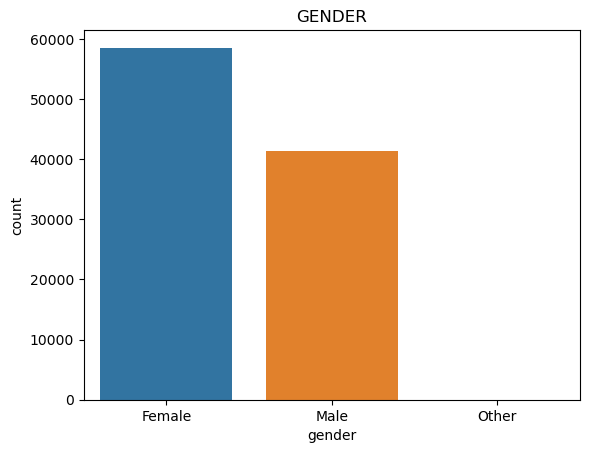

In [8]:
sns.countplot(x=df['gender'])
plt.title('GENDER')

In [10]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Text(0.5, 1.0, 'SMOKING')

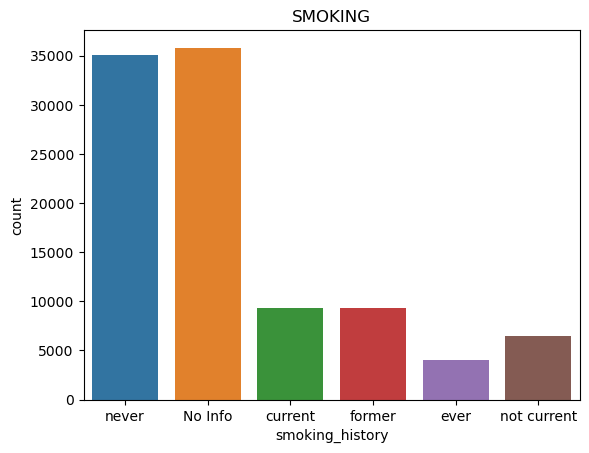

In [11]:
sns.countplot(x=df['smoking_history'])
plt.title("SMOKING")

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
enc=OrdinalEncoder()

In [15]:
a=['smoking_history']
b=['gender']
df[a]=enc.fit_transform(df[a])
df[b]=enc.fit_transform(df[b])

In [16]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0.0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0.0,17.37,6.5,100,0
99997,1.0,66.0,0,0,3.0,27.83,5.7,155,0
99998,0.0,24.0,0,0,4.0,35.42,4.0,100,0


In [17]:
cor=df.corr()

In [18]:
cor.style.background_gradient(cmap='spring')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x=df.iloc[:,0:9]
y=df['diabetes']

In [58]:
ptr,pts,qtr,qts=train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
ptr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
31152,1.0,4.0,0,0,4.0,27.32,3.5,200,0
33499,1.0,25.0,0,0,0.0,27.32,5.0,80,0
18594,1.0,70.0,1,1,2.0,43.58,7.0,160,1
97132,0.0,58.0,0,0,1.0,30.65,5.8,80,0
56015,0.0,80.0,0,0,0.0,27.32,4.5,158,0
...,...,...,...,...,...,...,...,...,...
9372,1.0,71.0,1,0,4.0,29.74,8.8,145,1
93553,1.0,46.0,0,0,3.0,27.32,4.5,90,0
50496,0.0,45.0,0,0,4.0,27.32,4.8,159,0
94735,0.0,69.0,0,0,4.0,21.12,6.6,90,0


In [60]:
qtr

31152    0
33499    0
18594    1
97132    0
56015    0
        ..
9372     1
93553    0
50496    0
94735    0
83209    0
Name: diabetes, Length: 80000, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
mod=LogisticRegression()

In [63]:
mod.fit(ptr,qtr)

C:\Users\Kumaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
pred=mod.predict(pts)
print(pred)

[0 0 0 ... 0 0 0]


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [66]:
acc=accuracy_score(qts,pred)
print("Accuracy is:",acc*100)
pre=precision_score(qts,pred)
print("Precision:",pre*100)
rec=recall_score(qts,pred)
print("Recall:",rec*100)
F1=f1_score(qts,pred)
print("F1 Score:",F1*100)

Accuracy is: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0


In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
c=confusion_matrix(qts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[18338     0]
 [    0  1662]]


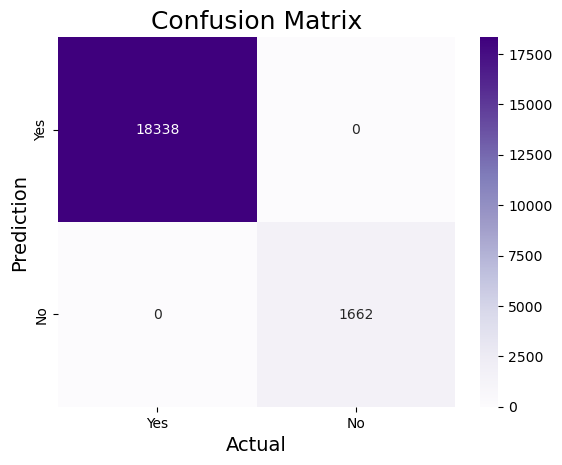

In [69]:
sns.heatmap(c,annot=True,fmt='g',cmap='Purples',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Prediction',fontsize=14)
plt.title("Confusion Matrix",fontsize=18)
plt.show()